In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "desktop/MSU_Data_bootcamp/Matplotlib_challenge/Mouse_metadata.csv"
study_results_path = "desktop/MSU_Data_bootcamp/Matplotlib_challenge/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
ms_full_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview

ln = len(ms_full_df)

print(ln)
ms_full_df.head(10)

1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_no = len(pd.unique(ms_full_df["Mouse ID"]))

print("There are " + str(mouse_no) + " mice")

There are 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dupes uses .duplicated() which returs a bool for each value based on whether it is a duplicate

dupes = ms_full_df.duplicated()

#sorting by descending puts duplicates at the top where they are more obvious
dupes = dupes.sort_values(ascending = False)

dupes

909      True
1892    False
649     False
622     False
623     False
        ...  
1265    False
1266    False
1267    False
1268    False
0       False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#this iloc command calls the index of the duplicated row
dupe = ms_full_df.iloc[909]

print(dupe)

Mouse ID                  g989
Drug Regimen          Propriva
Sex                     Female
Age_months                  21
Weight (g)                  26
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Name: 909, dtype: object


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
#this command drops duplicate rows
ms_uniq_df = ms_full_df.drop_duplicates()

#I'm repeating my method for identifying duplicates to make sure the dupe row is gone
test = ms_uniq_df.duplicated()

test = test.sort_values(ascending = False)

test

1892    False
634     False
622     False
623     False
624     False
        ...  
1266    False
1267    False
1268    False
1269    False
0       False
Length: 1892, dtype: bool

In [6]:
#Checking the number of mice in the clean DataFrame.

mice = len(pd.unique(ms_uniq_df["Mouse ID"]))
           
print('there are ' + str(mice) + ' mice')

there are 249 mice


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean tumor volume per regimine

t_vol_st = ms_uniq_df[["Drug Regimen","Tumor Volume (mm3)"]].copy()

mn_vol = t_vol_st.groupby("Drug Regimen").mean()

mn_vol = mn_vol.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})

#median tumor volume

md_vol = t_vol_st.groupby("Drug Regimen").median()

md_vol = md_vol.rename(columns = {"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})

#variance

var_vol = t_vol_st.groupby("Drug Regimen").var()

var_vol = var_vol.rename(columns = {"Tumor Volume (mm3)":"Variance"})

#standard deviation

std_vol = t_vol_st.groupby("Drug Regimen").std()

std_vol = std_vol.rename(columns = {"Tumor Volume (mm3)":"Standard Deviation"})

#SEM

sem_vol = t_vol_st.groupby("Drug Regimen").sem()

sem_vol = sem_vol.rename(columns = {"Tumor Volume (mm3)":"Standard Error of Mean"})

#measurement count

ct_vol = t_vol_st.groupby("Drug Regimen").count()

ct_vol = ct_vol.rename(columns = {"Tumor Volume (mm3)":"Measurement Count"})

# Assemble the resulting series into a single summary dataframe.

m1 = pd.merge(mn_vol, md_vol, on = "Drug Regimen")

m2 = pd.merge(std_vol, var_vol, on = "Drug Regimen")

m3 = pd.merge(sem_vol, ct_vol, on = "Drug Regimen")

m4 = pd.merge(m1, m2, on = "Drug Regimen")

full_stats = pd.merge (m4, m3, on = "Drug Regimen")

full_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation,Variance,Standard Error of Mean,Measurement Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346,230
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821,178
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236,178
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860,188
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466,186
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331,181
Propriva,52.368318,50.909965,6.502160,42.278090,0.514041,160
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955,228
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111,181


In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line
#adapted from a helpful resource: 
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

summry = t_vol_st.groupby("Drug Regimen").agg(
    mean_volume = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "mean"),
    median_volume = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "median"),
    standard_deviation = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "std"),
    variance = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "var"),
    standard_error = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "sem"),
    measurement_count = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "count")
)

summry


,mean_volume,median_volume,standard_deviation,variance,standard_error,measurement_count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346,230
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821,178
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236,178
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860,188
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466,186
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331,181
Propriva,52.368318,50.909965,6.502160,42.278090,0.514041,160
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955,228
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111,181


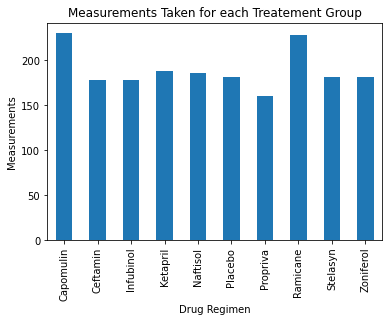

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

ct_vol.plot(kind = "bar", title = "Measurements Taken for each Treatement Group", legend = False)
plt.ylabel("Measurements")
plt.show()

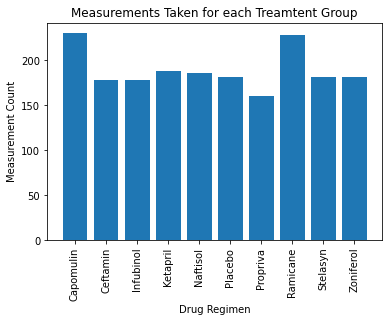

In [10]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#strangely this plotting method did not work when I tried to call the data from ct_vol usng ct_vol["Measurement Count"]

x_label = pd.unique(ms_uniq_df["Drug Regimen"])

count = summry["measurement_count"]

x_label.sort()

plt.bar(x_label, count)

plt.title("Measurements Taken for each Treamtent Group")
plt.ylabel("Measurement Count")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = "vertical")

plt.show()

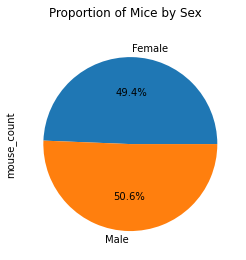

In [11]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

sx_stat = ms_uniq_df[["Mouse ID", "Sex"]].copy()

#I'm using a groupby object to get my count of the two sexes

sx = sx_stat.groupby("Sex").agg(mouse_count = pd.NamedAgg(column = "Mouse ID", aggfunc = "count"))

sx.plot(kind = "pie", subplots = True, autopct = "%1.1f%%", legend = False, 
        title = "Proportion of Mice by Sex")

plt.show()

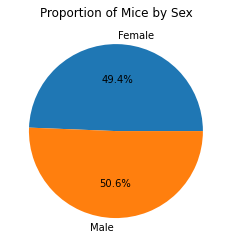

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

plt.pie(sx["mouse_count"], labels = labels, autopct = "%1.1f%%")

plt.title("Proportion of Mice by Sex")

plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

fin_df = ms_uniq_df[["Mouse ID", "Timepoint"]].copy()

fin = fin_df.groupby("Mouse ID").max()

fin = fin.rename(columns = {"Timepoint":"Final_Timepoint"})

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#this merge puts a new column "Final_Timepoint" on the data

fin_full = pd.merge(fin, ms_uniq_df, on = "Mouse ID")


#endpts is a filtering criteria. its set so that the final timepoint matches the timepoint
#this is actually the part where I isolate the relevant data

endpts = fin_full['Final_Timepoint']==fin_full['Timepoint']

end_df = fin_full[endpts].copy()

end_df


,Mouse ID,Final_Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a262,45,Placebo,Female,17,29,45,70.717621,4
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
46,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
1851,z435,10,Propriva,Female,12,26,10,48.710661,0
1861,z578,45,Ramicane,Male,11,16,45,30.638696,0
1871,z581,45,Infubinol,Female,24,25,45,62.754451,3
1881,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [14]:
#Put treatments into a list for for loop (and later for plot labels)

treatments = fin_full[["Drug Regimen"]].copy()

treatments = treatments.drop_duplicates()

#the tolist() function can be used to make a list out of a dataframe

t_list = treatments["Drug Regimen"].tolist()

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

end_df_quart = end_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])


#this data frame will have all the data necessary for the box plots
end_df_t = end_df[["Drug Regimen", "Tumor Volume (mm3)"]].copy()

#filter for just the interesting drugs
#of_intr = end_df_t["Drug Regimen"] == "Capomulin"|"Ramicane"|"Infubinol"|"Ceftamin" - It didn't like this because of the or 
#operator

#filters for each drut
capo = end_df_t["Drug Regimen"] == "Capomulin"

rami = end_df_t["Drug Regimen"] == "Ramicane"

infu = end_df_t["Drug Regimen"] == "Infubinol"

ceft = end_df_t["Drug Regimen"] == "Ceftamin"

sham = end_df_t["Drug Regimen"] == "Placebo"

#dfs for each drug

sham_df = end_df_t[sham].copy()

capo_df = end_df_t[capo].copy()

rami_df = end_df_t[rami].copy()

infu_df = end_df_t[infu].copy()

ceft_df = end_df_t[ceft].copy()

#combine the dfs into one for plotting
#note the dataframe i have here is problematic because it has a lot of null values
#these seem to be an artifact of the indecies in the dataframes I'm pulling the data from
#not lining up. It still works for plotting, though, so I'm not worried about that. 

drug_tumor_vol = {"Sham":sham_df["Tumor Volume (mm3)"],
                  "Capomulin":capo_df["Tumor Volume (mm3)"], 
                  "Ceftamin":ceft_df["Tumor Volume (mm3)"],
                  "Infubinol":infu_df["Tumor Volume (mm3)"],
                  "Ramicane":rami_df["Tumor Volume (mm3)"]
                 } 

dtv_df = pd.DataFrame(data = drug_tumor_vol)
 
    
#Determine outliers using upper and lower bounds

#converting my quartile df to a list for ease of manipulation

q_list = end_df_quart.tolist()

tvol_iqr = q_list[2] - q_list[0]

out_top = q_list[2] + 1.5*tvol_iqr

out_bottom = q_list[0] - 1.5*tvol_iqr

#quartile analysis outputs

print("Outlier analysis for the combined endpoint tumor volume data:")
print("The 1st quartile is " + str(round(q_list[0], 2)) + " cubic mm")
print("The 3rd quartile is " + str(round(q_list[2], 2)) + " cubic mm")
print("The interquartile range is " + str(round(tvol_iqr, 2)) + " cubic mm")
print("Tumors with volume greater than " + str(round(out_top, 2)) + " or less than "
      + str(round(out_bottom, 2))+ " are likely outliers.")

Outlier analysis for the combined endpoint tumor volume data:
The 1st quartile is 45.93 cubic mm
The 3rd quartile is 64.96 cubic mm
The interquartile range is 19.02 cubic mm
Tumors with volume greater than 93.49 or less than 17.4 are likely outliers.


In [15]:
#checking combined data for outliers

low_ol = end_df["Tumor Volume (mm3)"].loc[end_df["Tumor Volume (mm3)"] < 17.4]

high_ol = end_df["Tumor Volume (mm3)"].loc[end_df["Tumor Volume (mm3)"] > 93.49]

print("Outliers are priinted below. Empty sets indicate an absence of outliers.")
print(low_ol)
print(high_ol)

Outliers are priinted below. Empty sets indicate an absence of outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)


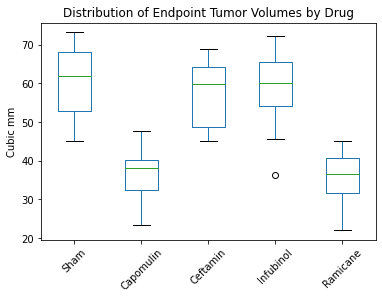

In [16]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Sham was added because it is bad scientific practice to display treatement groups without controls 
#for reference. 

boxplot = dtv_df.boxplot(grid = False, rot = 45)

plt.title("Distribution of Endpoint Tumor Volumes by Drug")
plt.ylabel("Cubic mm")

plt.show()

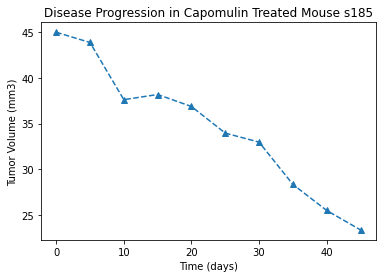

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap2 = ms_uniq_df["Drug Regimen"] == "Capomulin"

cap_mice = ms_uniq_df[cap2].copy()

m_s185 = cap_mice["Mouse ID"] == "s185"

#I picked the first mouse on the list to plot
s185 = cap_mice[m_s185]

#plot setup
plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"], marker = "^", linestyle = "dashed")
plt.title("Disease Progression in Capomulin Treated Mouse s185")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

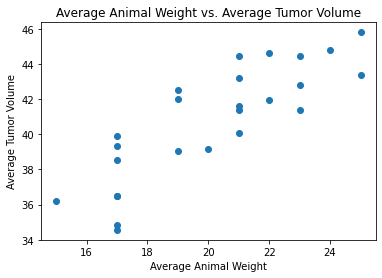

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

t_vs_w = cap_mice.groupby("Mouse ID").mean()

plt.scatter(t_vs_w["Weight (g)"], t_vs_w["Tumor Volume (mm3)"])
plt.title("Average Animal Weight vs. Average Tumor Volume")
plt.xlabel("Average Animal Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

The Pearson r correlation between mean weight and mean tumor volume is 0.84


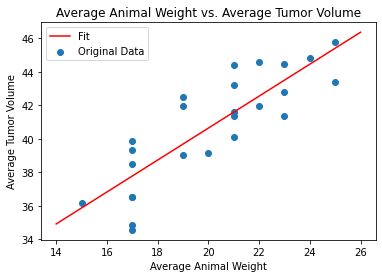

***Linear Regression Analysis***
slope: 0.95
y int: 21.55
R - squared: 0.71
P value: 1.3225722434712642e-07
standard error: 0.13


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation
t_w_corr = st.pearsonr(t_vs_w["Weight (g)"], t_vs_w["Tumor Volume (mm3)"])

print("The Pearson r correlation between mean weight and mean tumor volume is " + str(round(t_w_corr[0], 2)))

#linear regression analysis
slope, intr, r_val, p_val, std_er = st.linregress(t_vs_w["Weight (g)"],t_vs_w["Tumor Volume (mm3)"])
rsqr = r_val**2

#linear regression plot

#this list is the domain of my fit line
x = [14, 16, 18, 20, 22, 24, 26]

#attempting to multiply a list by a float is not allowed. This needs to be done with a numpy array instead.
x = np.asarray(x)

#plot setup
#this scipy documentation was helpful here: 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

plt.scatter(t_vs_w["Weight (g)"], t_vs_w["Tumor Volume (mm3)"], label = "Original Data")
plt.plot(x, intr + slope*x, 'r', label='Fit')
plt.title("Average Animal Weight vs. Average Tumor Volume")
plt.xlabel("Average Animal Weight")
plt.ylabel("Average Tumor Volume")
plt.legend()
plt.show()

#linear regression output
print("***Linear Regression Analysis***")
print("slope: " + str(round(slope,2)))
print("y int: " + str(round(intr, 2)))
print("R - squared: " + str(round(rsqr,2)))
print("P value: " + str(p_val))
print("standard error: " + str(round(std_er, 2)))